### Google App store data Analysis

https://www.kaggle.com/lava18/google-play-store-apps/kernels


In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [131]:

df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [132]:
# see type of the data now
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(10841, 13)

In [133]:
# see last 5 rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [134]:
# dicribe the dataset now
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


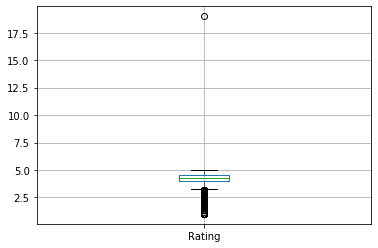

In [135]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32057c88>]],
      dtype=object)

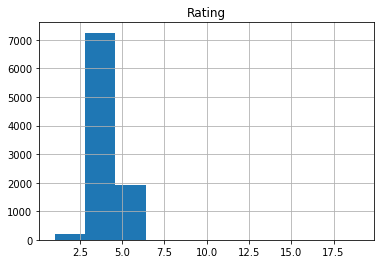

In [136]:
df.hist()

In [137]:
# information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [138]:
# data cleaning 
# check with null values now
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [139]:
# check how many rating are more then 5 - outliers
df[df.Rating > 5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [140]:
# remove the above outliers
df.drop([10472], inplace = True)

In [141]:
# after removed outliers from dataset
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


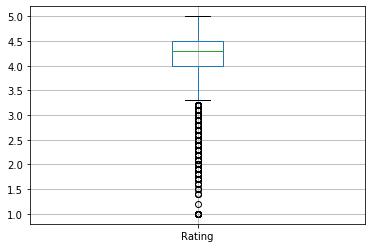

In [142]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31ed6160>]],
      dtype=object)

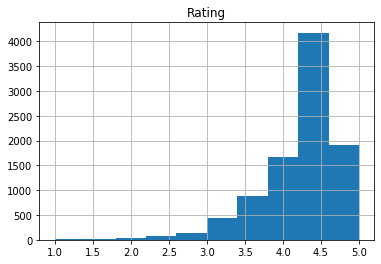

In [143]:
df.hist()

In [144]:
 # find the threshold value
threshold = len(df) * 0.1

In [145]:
# drop that column if any value as threshold
df.dropna(thresh = threshold, axis = 1, inplace = True)

In [146]:
# now check the 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [147]:
# data manupulation and imputation
# fill the null values using agregation functions such as mean, meadian, mode


In [148]:
# here null values are filled with the mean
df['Rating'] = df['Rating'].fillna((df['Rating'].mean()))


In [149]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [150]:
# filing the string value with mode
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace = True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace = True)

In [151]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [159]:
# in this dataset we have some values change into type convertion.
# those are install, price,  ratings.
df['Reviews'] = pd.to_numeric(df['Reviews'],errors = 'coerce')
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [160]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [161]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null float64
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [162]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.478907,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [166]:
# data visualization
group = df.groupby('Category')
x = group['Rating'].agg(np.mean)
y = group['Reviews'].agg(np.mean)
z = group['Installs'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.350389
AUTO_AND_VEHICLES      4.190601
BEAUTY                 4.260553
BOOKS_AND_REFERENCE    4.310663
BUSINESS               4.145448
COMICS                 4.156392
COMMUNICATION          4.163601
DATING                 4.007601
EDUCATION              4.387768
ENTERTAINMENT          4.126174
EVENTS                 4.363178
FAMILY                 4.192214
FINANCE                4.138922
FOOD_AND_DRINK         4.170485
GAME                   4.282441
HEALTH_AND_FITNESS     4.266092
HOUSE_AND_HOME         4.196603
LIBRARIES_AND_DEMO     4.181590
LIFESTYLE              4.112145
MAPS_AND_NAVIGATION    4.064911
MEDICAL                4.189781
NEWS_AND_MAGAZINES     4.142713
PARENTING              4.281960
PERSONALIZATION        4.307288
PHOTOGRAPHY            4.192094
PRODUCTIVITY           4.208015
SHOPPING               4.253918
SOCIAL                 4.247808
SPORTS                 4.218136
TOOLS                  4.066075
TRAVEL_AND_LOCAL       4.119520

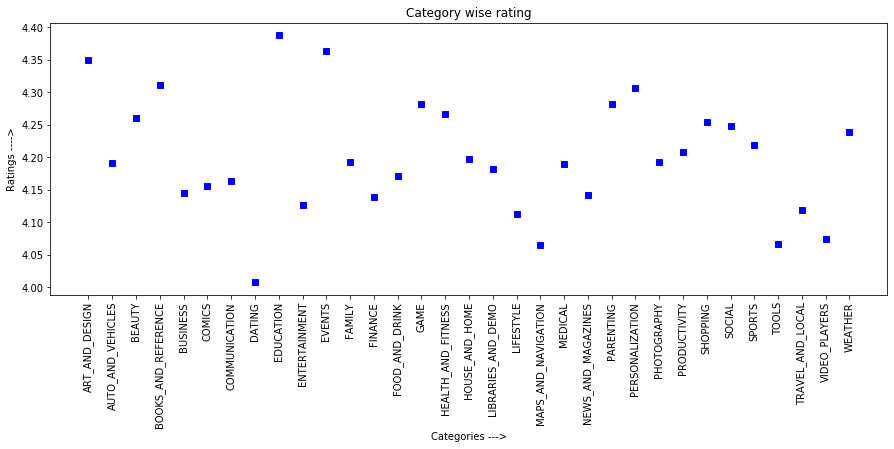

In [186]:
#plot the above agg
plt.figure(figsize=(15,5))
plt.plot(x, 'bs', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise rating')
plt.xlabel('Categories --->')
plt.ylabel('Ratings ---->')
plt.show()


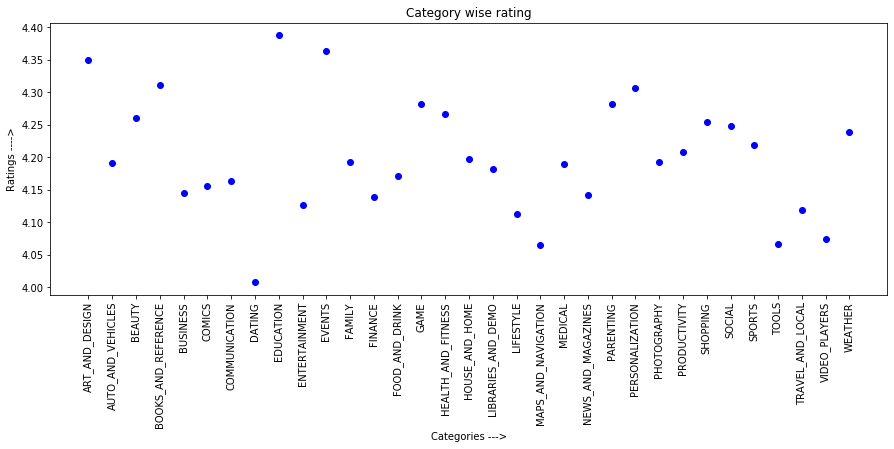

In [187]:
#plot the above agg
plt.figure(figsize=(15,5))
plt.plot(x, 'bo', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise rating')
plt.xlabel('Categories --->')
plt.ylabel('Ratings ---->')
plt.show()

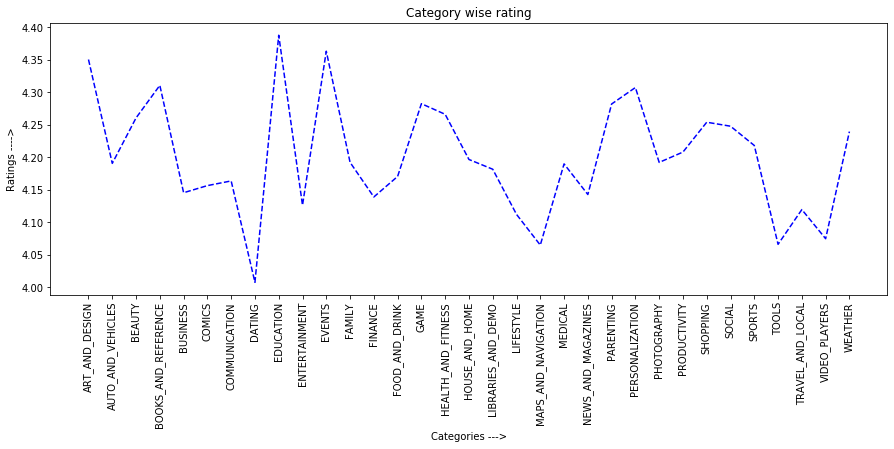

In [188]:
#plot the above agg
plt.figure(figsize=(15,5))
plt.plot(x, 'r--', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise rating')
plt.xlabel('Categories --->')
plt.ylabel('Ratings ---->')
plt.show()

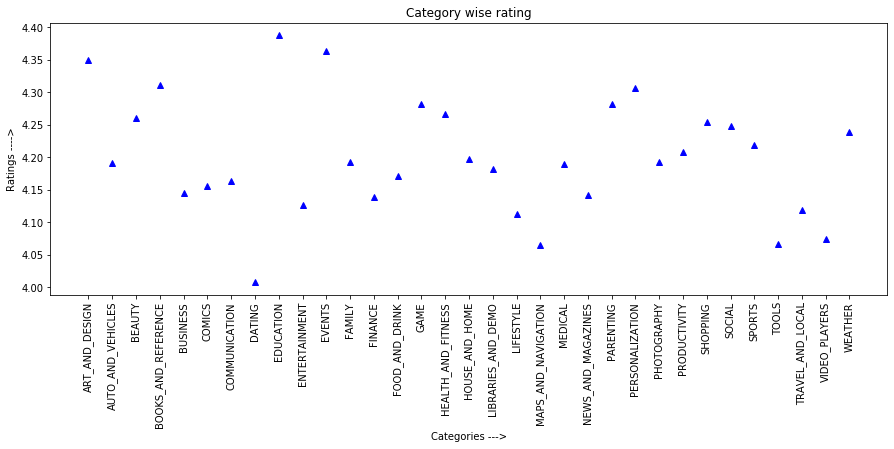

In [189]:
#plot the above agg
plt.figure(figsize=(15,5))
plt.plot(x, 'b^', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise rating')
plt.xlabel('Categories --->')
plt.ylabel('Ratings ---->')
plt.show()

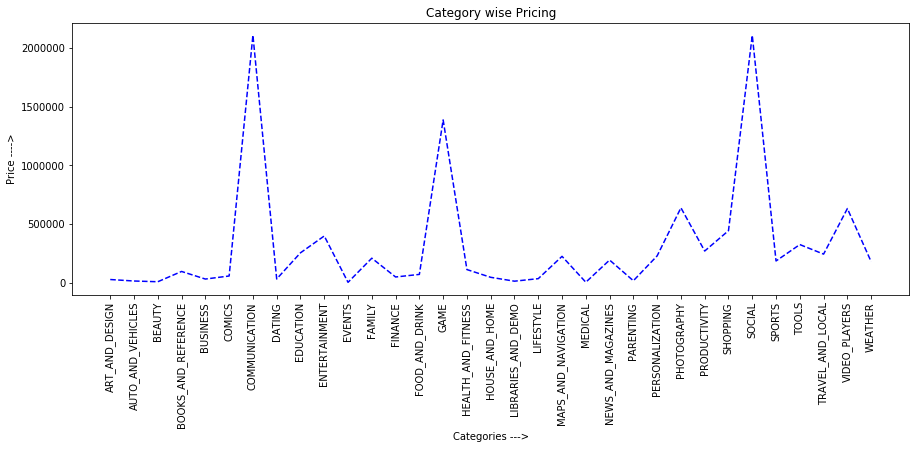

In [191]:
#plot the above agg
plt.figure(figsize=(15,5))
plt.plot(y, 'r--', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise Pricing')
plt.xlabel('Categories --->')
plt.ylabel('Price ---->')
plt.show()

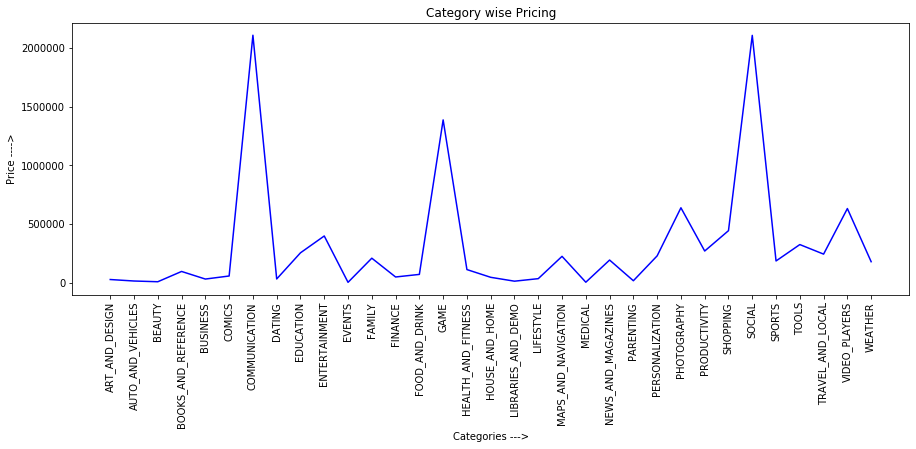

In [192]:
#plot the above agg
plt.figure(figsize=(15,5))
plt.plot(y, 'r-', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise Pricing')
plt.xlabel('Categories --->')
plt.ylabel('Price ---->')
plt.show()

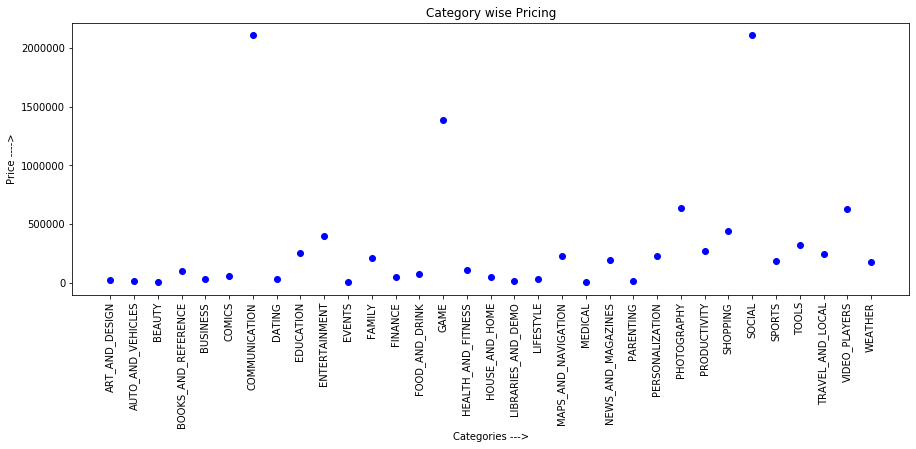

In [193]:
#plot the above agg
plt.figure(figsize=(15,5))
plt.plot(y, 'ro', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise Pricing')
plt.xlabel('Categories --->')
plt.ylabel('Price ---->')
plt.show()

In [195]:
# here i can visualize in tableau
df.to_csv('cleaned_googleplaystore.csv')